In [1]:
from pybaseball import statcast

Get data from statcast using pybaseball

In [2]:
#start = '2017-05-01'
# Use shorter time period so I can load this into memory
start = '2019-08-01'
end = '2019-10-06'
data = statcast(start, end)

This is a large query, it may take a moment to complete
Completed sub-query from 2019-08-01 to 2019-08-06
Completed sub-query from 2019-08-07 to 2019-08-12
Completed sub-query from 2019-08-13 to 2019-08-18
Completed sub-query from 2019-08-19 to 2019-08-24
Completed sub-query from 2019-08-25 to 2019-08-30
Completed sub-query from 2019-08-31 to 2019-09-05
Completed sub-query from 2019-09-06 to 2019-09-11
Completed sub-query from 2019-09-12 to 2019-09-17
Completed sub-query from 2019-09-18 to 2019-09-23
Completed sub-query from 2019-09-24 to 2019-09-29
Completed sub-query from 2019-09-30 to 2019-10-05
Completed sub-query from 2019-10-06 to 2019-10-06


In [3]:
data.head()

,index,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,...,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment
0,0,CU,2019-10-05,84.2,-2.4275,5.7084,Jonathan Loaisiga,593934.0,642528.0,strikeout,...,8.0,2.0,2.0,8.0,2.0,8.0,2.0,8.0,Infield shift,Standard
1,1,FF,2019-10-05,97.6,-2.8829,5.4358,Jonathan Loaisiga,593934.0,642528.0,NaN,...,8.0,2.0,2.0,8.0,2.0,8.0,2.0,8.0,Infield shift,Standard
2,2,FF,2019-10-05,96.4,-2.7657,5.5520,Jonathan Loaisiga,593934.0,642528.0,NaN,...,8.0,2.0,2.0,8.0,2.0,8.0,2.0,8.0,Infield shift,Standard
3,3,CU,2019-10-05,83.4,-2.6126,5.7184,Jonathan Loaisiga,593934.0,642528.0,NaN,...,8.0,2.0,2.0,8.0,2.0,8.0,2.0,8.0,Infield shift,Standard
4,4,CU,2019-10-05,83.8,-2.5627,5.7197,Jonathan Loaisiga,593934.0,642528.0,NaN,...,8.0,2.0,2.0,8.0,2.0,8.0,2.0,8.0,Infield shift,Standard


In [4]:
data.columns

Index(['index', 'pitch_type', 'game_date', 'release_speed', 'release_pos_x',
       'release_pos_z', 'player_name', 'batter', 'pitcher', 'events',
       'description', 'spin_dir', 'spin_rate_deprecated',
       'break_angle_deprecated', 'break_length_deprecated', 'zone', 'des',
       'game_type', 'stand', 'p_throws', 'home_team', 'away_team', 'type',
       'hit_location', 'bb_type', 'balls', 'strikes', 'game_year', 'pfx_x',
       'pfx_z', 'plate_x', 'plate_z', 'on_3b', 'on_2b', 'on_1b',
       'outs_when_up', 'inning', 'inning_topbot', 'hc_x', 'hc_y',
       'tfs_deprecated', 'tfs_zulu_deprecated', 'fielder_2', 'umpire', 'sv_id',
       'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az', 'sz_top', 'sz_bot',
       'hit_distance_sc', 'launch_speed', 'launch_angle', 'effective_speed',
       'release_spin_rate', 'release_extension', 'game_pk', 'pitcher.1',
       'fielder_2.1', 'fielder_3', 'fielder_4', 'fielder_5', 'fielder_6',
       'fielder_7', 'fielder_8', 'fielder_9', 'release_pos_y',
     

Since we're trying to predict pitches, we need to get rid of many of these columns

In [5]:
columns = list(data.columns)
columns_keep = ['pitch_type', 'release_speed', 'release_pos_x', 'release_pos_z',
                'p_throws', 'pfx_x', 'pfx_z', 'plate_x', 'plate_z',
               'zone', 'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az', 'release_spin_rate', 'release_extension',
                'release_pos_y'
               ]

In [6]:
# Iterate through columns_keep and use pop() to remove the columns from `column`
# We will the use data.drop([columns]) to remove the remaining columns from the data frame
def remove_columns(all_columns, remove):
    """
    Parameters
    ----------
    all_columns: list
        all columns in a Pandas dataframe
    remove: list
        columns to remove from 'all_columns'
    Returns
    -------
    all_columns: list
        Updated columns after removal
    """
    for col in remove:
        all_columns.remove(col)
    
    return all_columns

In [7]:
col_to_drop = remove_columns(columns, columns_keep)

In [8]:
data = data.drop(col_to_drop, axis=1)

In [9]:
data.head()

,pitch_type,release_speed,release_pos_x,release_pos_z,zone,p_throws,pfx_x,pfx_z,plate_x,plate_z,vx0,vy0,vz0,ax,ay,az,release_spin_rate,release_extension,release_pos_y
0,CU,84.2,-2.4275,5.7084,14.0,R,0.7925,-0.0736,1.4830,0.9027,7.4552,-122.3205,-4.5537,6.2966,24.6117,-32.2287,2735.0,5.817,54.6827
1,FF,97.6,-2.8829,5.4358,6.0,R,-0.8580,1.1823,0.2955,2.6937,10.5015,-141.7894,-4.5775,-13.8944,31.2818,-15.4201,2445.0,6.294,54.2057
2,FF,96.4,-2.7657,5.5520,11.0,R,-0.4666,1.3073,-0.2339,5.9665,7.8076,-140.2144,3.6831,-7.8654,29.9763,-15.7979,2455.0,6.437,54.0626
3,CU,83.4,-2.6126,5.7184,13.0,R,1.0097,-0.6510,-0.5133,1.5812,2.8603,-121.4015,-1.8295,9.2344,23.1677,-38.3727,2795.0,5.707,54.7924
4,CU,83.8,-2.5627,5.7197,6.0,R,0.6595,-0.5981,0.3610,2.5129,5.4282,-121.9816,0.0995,5.4905,22.2550,-38.2974,2743.0,5.747,54.7525


### Defining the columns:
#### `release_speed`: Pitch velocities in mph
#### `release_pos_x`: Horizontal release position of pitch from catcher's perspective 
#### `release_pos_z`: Vertical release position of pitch
#### `zone`: Zone location of the ball when it cross the plate from the catcher's perspective
#### `p_throws`: Handedness of pitcher\n
#### `pfx`: Horizontal (or vertical) movement of pitch in feet
#### `plate_`: Position of ball when it reaches plate from catcher's perspective
#### `vx,vy,vz`: velocity of pitch in feet per second
#### `ax,ay,az`: acceleration of pitch, in feet per second^2
#### `release_spin_rate`: Spin rate of pitch
#### `release_extension`: Release extension of pitch in feet
#### `release_pos_y`: Release position of pitch measured in feet from the catcher's perspective.

### Potential Features to add:
#### movement: DIfference of `release_pos` and `plate_pos`

In [12]:
data = data.dropna(subset=['pitch_type'])

In [22]:
pitch_types = list(data.pitch_type.values)

In [27]:
set(pitch_types)

{'CH', 'CU', 'EP', 'FC', 'FF', 'FS', 'FT', 'KC', 'SI', 'SL'}

### Pitch Types
#### `CH`: changeup
#### `CU`:  curveball
#### `EP`: ephus
#### `FC`: cutter
#### `FF`: four-seam
#### `FS`: splitter
#### `FT`: two-seam 
#### `KC`: knuckle-curve
#### `SI`: sinker
#### `SL`: slider

Let's take a look at some distributions of several of these features

In [30]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
speed_histo = plt.hist(data.release_speed, bins=300)

There appears to be a distribution of pitches around 85 mph(off-speed) and a distribution around 93-4 mph (fastball)

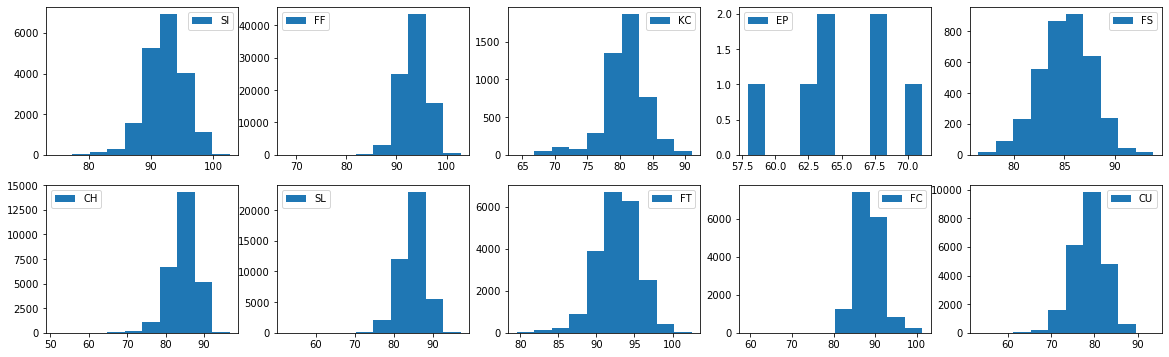

In [58]:
num_pitches = len(set(pitch_types))
pitches = list(set(pitch_types))
fig, axes = plt.subplots(nrows=2, ncols=round(num_pitches/2), figsize=(20,6))
k = 0
for i in [0,1]:
    for j in range(round(num_pitches/2)):
        histo = axes[i,j].hist(data.release_speed[data.pitch_type == pitches[k]], label=pitches[k])
        axes[i,j].legend()
        k += 1

### A Few notes on pitch types versus velocity:
#### - Sinker, Four-seam, two-seam, and cutter have similar velocity distributions
#### - curve, knuckle-curve, and changeup have similar velocity distributions
#### - ephus pitches are hardely thrown, and when they are, their velocities are much lower than the other pitches

Pitch movement: http://baseball.physics.illinois.edu/Movement.pdf

#### Movement: deviation of trajectory from a straight line without the effect of gravity